
At the end of the experiment:

* obtain the mfcc features from audio samples 
* train the classifier with these mfcc features
* classify the audio samples into 'yes' and 'no'

### Description
The dataset used in the experiment contains 1391 audio samples with the extension .wav. 

Each audio sample has utterances 'yes' or 'no'

The naming convention of the sample is of the format 'yes_no/' followed by '10' (representing 'yes') or '11' (representing 'no')

Ex:   

        'yes_no/10_g38_46.wav'    ---> yes audio sample
        'yes_no/11_G6_11.wav'     ---> no audio sample



### Importing Required Packages

In [ ]:
import os

import warnings
warnings.filterwarnings("ignore")

# Math
import numpy as np
from scipy import signal
from scipy.io import wavfile
import librosa

# Visualization
import matplotlib.pyplot as plt
import librosa.display

from matplotlib.pyplot import *
%matplotlib inline

# Import glob to perform pattern matching to find files
import glob

# Import train_test_split to split the data into train and test sets
from sklearn.model_selection import train_test_split

# Import MLPClassifier to be trained on features of wav files
from sklearn.neural_network import MLPClassifier

In [ ]:
labels = []
wave_files = []
for filename in glob.iglob('yes_no/*.wav', recursive=True):
  # Store the labels of each wav file in a list
  labels.append(int((filename.split("/")[-1]).split("_")[0]))
  # Store the wav files in a list
  wave_files.append(filename)

We load the wavefile, convert it to Melspectrogram features.
Function returns the features and the resample rate

In [ ]:
def get_melspectrogram_features(filename):
    y, sr = librosa.load(filename)
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S,sr

#### Let us try to extract the features of one the wave file and plot the melspectrograms of the data


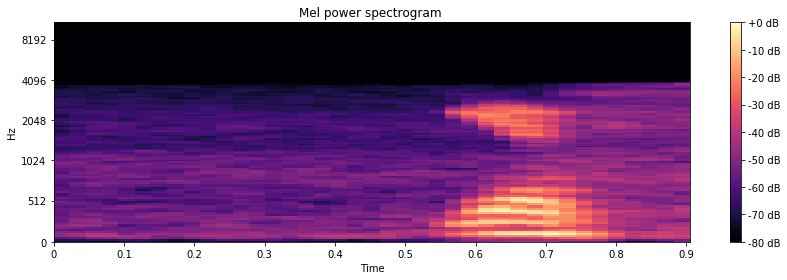

In [ ]:
features,sr = get_melspectrogram_features(wave_files[3])
plt.figure(figsize=(12, 4))
librosa.display.specshow(features, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()


In [ ]:
'''
Load the wav files by passing them to librosa.load 
Get the features as a power spectogram using melspectogram 
Convert the power spectogram to decibels 
Use the features obtained from melspectogram as input to MFCC to convert them to mel-scale
The mfcc features are then passed to delta which perform 2nd order differentiation
Delta is applied at each frame to get variance between frames
Function returns mfcc features and 2nd order differentiated mfcc features
'''
def get_mfcc_features(filename):
    frames = 15
    y, sr = librosa.load(filename)
    D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=D)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S,ref=np.max)
    features = librosa.feature.mfcc(S=log_S, n_mfcc=30)
    if features.shape[1] < frames :
        features = np.hstack((features, np.zeros((n_mfcc, frames - features.shape[1]))))
    elif features.shape[1] > frames:
        features = features[:, :frames]
    delta2_mfcc = librosa.feature.delta(features, order=2)
    return features,delta2_mfcc

### Let us try to calculate mfcc features of one sample and try to visualize those features

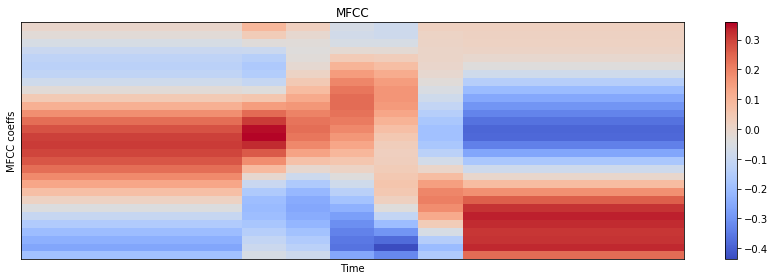

In [ ]:
mfcc_features,delta2_mfcc = get_mfcc_features(wave_files[0])
plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

### Extracting mfcc features for all the samples

In [ ]:
features = []
for filename in wave_files:
    fea, delta_2 = get_mfcc_features(filename)
    features.append(fea)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, np.array(labels), test_size=0.1)

### Get the length of the train and test data

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1161, 130, 1161, 130)

In [ ]:
# Convert the X_train to an array and reshape from 1251*30*15 to 1251*450

X_train = np.array(X_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] *  X_train.shape[2])

# Convert the X_test to an array and reshape from 140*30*15 to 140*450

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] *  X_test.shape[2])

In [ ]:
X_train.shape

(1161, 450)

In [ ]:
# Create a object for MLPClassifier 
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,10,5))

In [ ]:
# Fit the train fetaures and labels to the classifier object
clf.fit(np.array(X_train), np.array(y_train))    

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 10, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# Predict the labels of the test features
predicted_values = clf.predict(X_test)

In [ ]:
predicted_values

array([11, 11, 11, 11, 10, 10, 11, 10, 11, 11, 10, 10, 10, 10, 10, 11, 10,
       10, 10, 10, 11, 10, 11, 11, 10, 10, 11, 11, 10, 11, 10, 10, 10, 11,
       10, 10, 10, 10, 10, 10, 11, 10, 11, 11, 10, 10, 10, 10, 11, 11, 11,
       11, 10, 11, 11, 10, 11, 10, 11, 11, 11, 11, 10, 10, 11, 10, 10, 10,
       10, 10, 11, 11, 10, 10, 11, 11, 11, 10, 10, 11, 10, 10, 11, 10, 11,
       11, 11, 10, 10, 11, 10, 10, 10, 11, 11, 10, 11, 11, 11, 11, 11, 11,
       10, 10, 11, 10, 11, 11, 11, 10, 11, 10, 11, 10, 10, 11, 11, 11, 11,
       10, 10, 11, 10, 10, 10, 10, 10, 10, 11, 11])

In [ ]:
# Get the accuracy score by comparing predicted labels and test labels
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted_values)

0.6923076923076923